In [86]:
from network import Net
from trainers import *
from utils import one_hot_monk
import numpy as np
import pandas as pd

Layer 1: Units = 4, Activation = relu
Layer 2: Units = 1, Activation = sigmoid


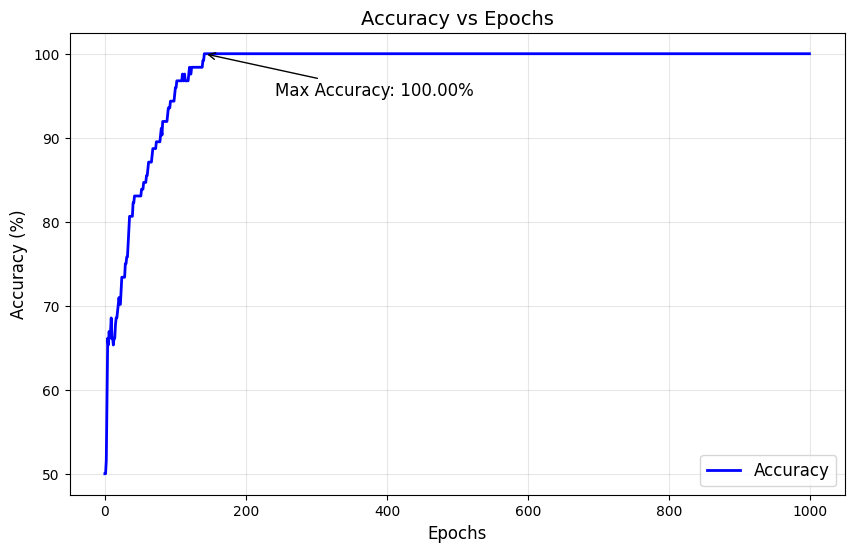

In [87]:
file_path = r'C:\Users\t-tan\OneDrive\Documenti\UNI\MAGISTRALE\ML\nn_from_scratch\datasets\monk_dataset\monks-1.train'
data = pd.read_csv(file_path, delimiter=' ', header=None, skipinitialspace=True)
data = np.array(data).T
n, m = data.shape # r, c
#np.random.shuffle(data) # this must be done ALWAYS, MONK is an exeption
# n,m == 8 124

Y_tr = data[0]

X_tr = data[1:n-1]
X_tr = one_hot_monk(X_tr)

network = Net('./config.yaml')
network.add_layer(4, 'relu')
network.add_layer(1, 'sigmoid')
network.print_structure()

model = train_model(X_tr, Y_tr, network.get_W(), network.get_b(), network.get_layers(), network.get_hyperparameters())

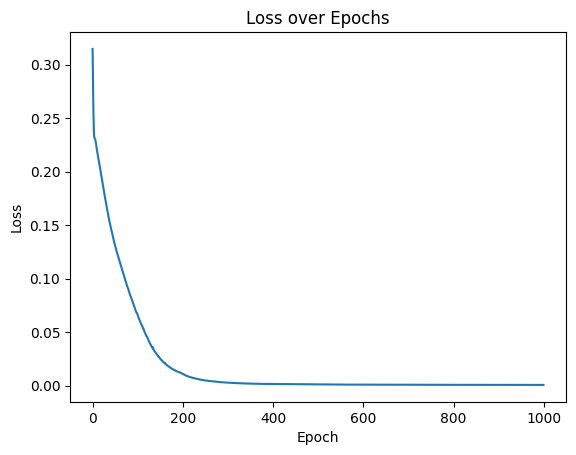

In [88]:
loss_df = pd.read_csv('loss_values.csv')

plt.plot(loss_df['epoch'], loss_df['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

Test Accuracy:  100.0


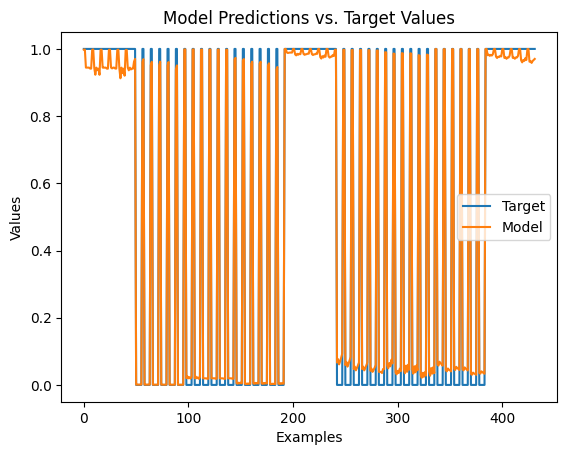

In [89]:
file_path = r'C:\Users\t-tan\OneDrive\Documenti\UNI\MAGISTRALE\ML\nn_from_scratch\datasets\monk_dataset\monks-1.test'
data = pd.read_csv(file_path, delimiter=' ', header=None, skipinitialspace=True)
data = np.array(data).T
n, m = data.shape # r, c

Y_test = data[0]

X_test = data[1:n-1]
X_test = one_hot_monk(X_test)

test_model(model[0], model[1], network.get_layers(), X_test, Y_test)